In [2]:
import sys
import os

# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from load_data import load_data

# Define your SQL query
query = "SELECT * FROM public.xdr_data"  # Replace with your actual table name


# Load data into a DataFrame
user_data= load_data(query)


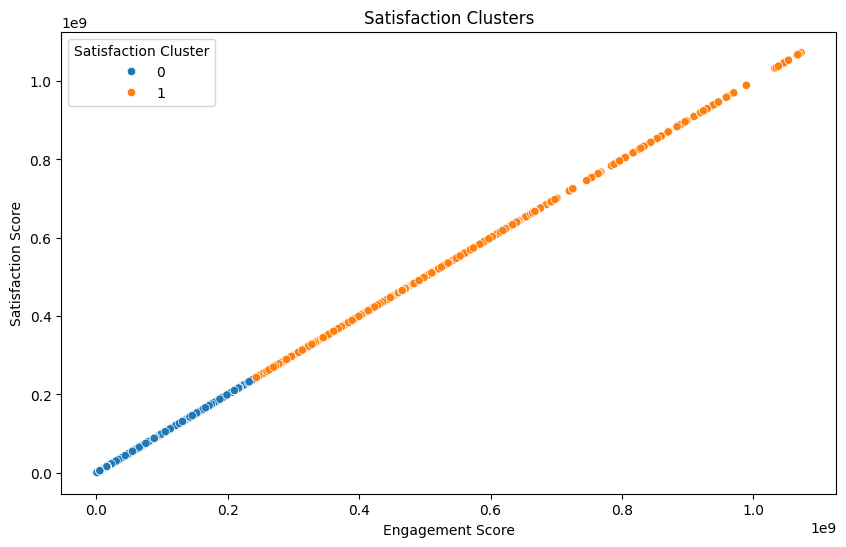

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Load the user_data (assuming it's already loaded from Task 3)
# user_data = pd.read_csv('path_to_task3_data.csv')

features = ['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']

# Fill missing values for numeric columns
user_data[features] = user_data[features].fillna(user_data[features].mean())

# Fit K-means clustering on the features
kmeans = KMeans(n_clusters=3)
kmeans.fit(user_data[features])

# Calculate engagement and experience scores
def calculate_score(data, centroids):
    distances = euclidean_distances(data, centroids)
    return distances.min(axis=1)

# Engagement and Experience score calculation
user_data['Engagement Score'] = calculate_score(user_data[['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']], kmeans.cluster_centers_)
user_data['Experience Score'] = calculate_score(user_data[['Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)', 'TCP DL Retrans. Vol (Bytes)']], kmeans.cluster_centers_)

# Satisfaction Score
user_data['Satisfaction Score'] = (user_data['Engagement Score'] + user_data['Experience Score']) / 2

# Clustering based on satisfaction scores
kmeans_satisfaction = KMeans(n_clusters=2)
user_data['Satisfaction Cluster'] = kmeans_satisfaction.fit_predict(user_data[['Engagement Score', 'Experience Score']])

# Visualize satisfaction clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engagement Score', y='Satisfaction Score', hue='Satisfaction Cluster', data=user_data)
plt.title("Satisfaction Clusters")
plt.show()
